In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats 

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, p = stats.ttest_ind(A, B)

print("t = " + str(t))
print("p = " + str(p))

t = -1.733800647210997
p = 0.08451003973499756


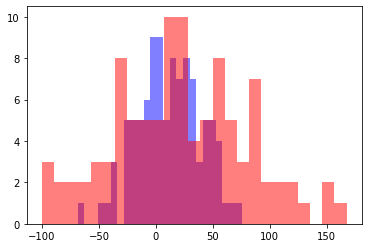

In [4]:
plt.hist(A, color='blue', alpha=0.5, bins=25);
plt.hist(B, color='red', alpha=0.5, bins=25);

Определяем p-value и получаем 8%. Это говорит нам о том, что выборки схожие. Значит у этих двух групп пациентов различий в эффекте нет.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, p = stats.ttest_rel(A, B)
t, p

(-2.1701703735210716, 0.03238579156467659)

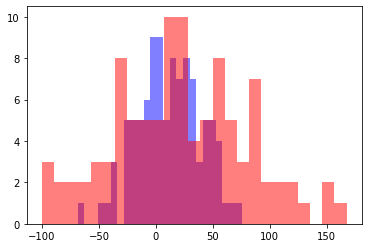

In [6]:
plt.hist(A, color='blue', alpha=0.5, bins=25);
plt.hist(B, color='red', alpha=0.5, bins=25);

В этом задании получаем p-value < 5%. Значит выборки различны. Хотя это те же выборки, что и в первом задании; я это понимаю как результат зависимости выборок (одни и те же пациенты до и после приёма препарата). Можем говорить об эффекте оказанном препаратом.

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобрением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [7]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


Дисперсионный анализ показывает p-value близкое к нулю, что говорит нам о сильном различии распределений.

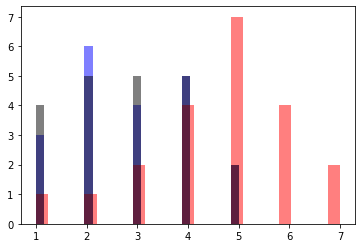

In [8]:
plt.hist(water, color='blue', alpha=0.5, bins=25);
plt.hist(nutri, color='red', alpha=0.5, bins=25);
plt.hist(mineral, color='black', alpha=0.5, bins=25);

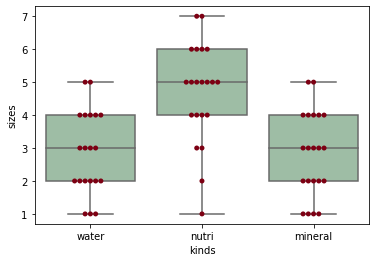

In [9]:
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

Визуализации помогают понять, что одна группа сильно отличается от двух других.

In [10]:
# Для воды и минералки
A = water
B = mineral

t, p = stats.ttest_ind(A, B)
t, p

(0.10129659201078253, 0.9198340218471441)

С помощью t-test убеждаемся в сильном отличии групп nutri/water, и почти идентичности water/mineral.

# Cookie Cats (Обязательно)

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [11]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [12]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Видно, что трафик разделён на две почти равные по объёму группы.

## Анализ данных

In [13]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1009027049.500, p=0.025


Малое p-value.

In [14]:
print(f"Средние значения отыгранных раундов:")
print(f"* для gate_30 - {data[data['version'] == 'gate_30']['sum_gamerounds'].mean()}")
print(f"* для gate_40 - {data[data['version'] == 'gate_40']['sum_gamerounds'].mean()}")

Средние значения отыгранных раундов:
* для gate_30 - 52.45626398210291
* для gate_40 - 51.29877552814966


Средние значения отыгранных раундов для двух групп почти одинаковы.

### Строим гистограмму

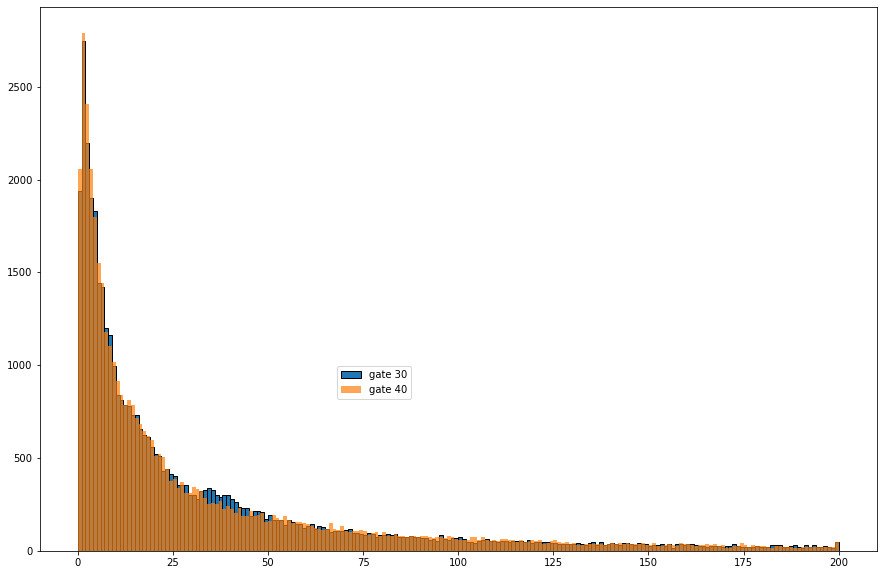

In [15]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Гистограмма показывает распределение игроков по количеству сыгранных раундов в течение первой недели после установки. Видим, что заметные различия между игроками двух групп встречаются в интервале 30-40 раундов, что по всей видимости обусловлено разницей в установленных воротах.

### Boxplot

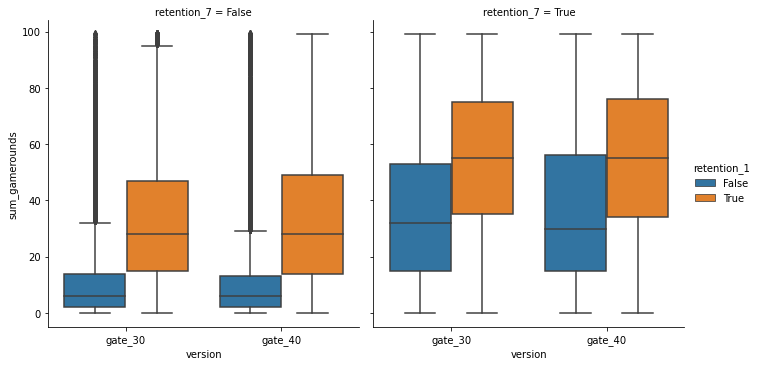

In [16]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


Построенные ящики с усами показывают распределение игроков по количеству сыгранных раундов в течение первой недели после установки с учётом их возвратов через 1 день и через 7 дней после установки. Глядя на эту визуализацию, можно сказать, что установка разных ворот не оказывает влияние на количество сыгранных раундов и на возврат игроков в игру. Факт возврата игрока в игру через 1 день и через 7 дней конечно влияет на общее количество пройденных раундов, но это скорее объясняется количеством часов проведенных в игре. 

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

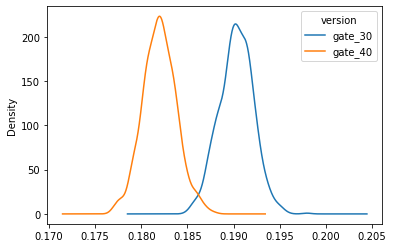

In [17]:
#Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

А вот это вообще не понятно. data.sample() возвращает случайную выборку из нашего датафрейма, ок. frac=1 значит 100% выборка, то есть весь датафрейм, и с перестановкой - replace=True, а зачем??? Дальше группируем по version и берём столбец retention_7, ну ок. А как мы берём среднее mean() от набора значений True и False?? И почему оно в каждом случае из 1000 раз range(1000) как-то меняется, если мы каждый раз берём 100% нашего датафрейма???

### Общий вывод:



Малое p-value говорит о различии выборок. При этом, на гистограмме мы видим явные отличия между выборками в районе 30-40 раундов, что очевидно является следствием разницы в установленных воротах. По всей видимости, установка ворот на 30 раунде приводит к повышению интереса к игре.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [91]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [60]:
df = pokemon[['pid', 'Name', 'Class 1', 'Attack']]
df = df.loc[df['Class 1'].isin(['Grass', 'Rock'])]

df

,pid,Name,Class 1,Attack
0,1,Bulbasaur,Grass,49
1,2,Ivysaur,Grass,62
2,3,Venusaur,Grass,82
3,4,Mega Venusaur,Grass,100
48,49,Oddish,Grass,50
...,...,...,...,...
768,769,Amaura,Rock,59
769,770,Aurorus,Rock,77
773,774,Carbink,Rock,50
795,796,Diancie,Rock,100


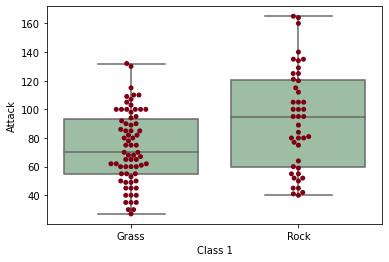

In [61]:
ax = sns.boxplot(x='Class 1', y='Attack', data=df, color='#99c2a2')
ax = sns.swarmplot(x='Class 1', y='Attack', data=df, color='#7d0013')
plt.show()

In [69]:
A = df.loc[df['Class 1'] == 'Grass']['Attack']
B = df.loc[df['Class 1'] == 'Rock']['Attack']

t, p = stats.ttest_ind(A, B)
t, p

(-3.450882886571366, 0.0007889348067931949)

Определяем p-value и получаем очень малое значение. Выборки имеют существенные отличия. Как видно на диаграмме, сила атаки покемонов класса Rock заметно выше, чем в классе Grass. Оук ошибался.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [78]:
df = pokemon[['pid', 'Name', 'Class 1', 'Speed']]
df = df.loc[df['Class 1'].isin(['Water', 'Normal'])]

df

,pid,Name,Class 1,Speed
9,10,Squirtle,Water,43
10,11,Wartortle,Water,58
11,12,Blastoise,Water,78
12,13,Mega Blastoise,Water,78
20,21,Pidgey,Normal,56
...,...,...,...,...
728,729,Diggersby,Normal,78
729,730,Fletchling,Normal,62
744,745,Furfrou,Normal,102
762,763,Clauncher,Water,44


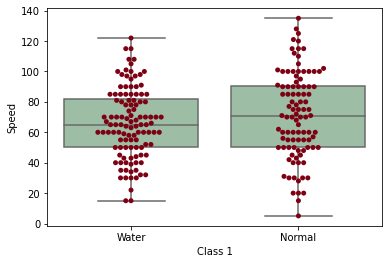

In [79]:
ax = sns.boxplot(x='Class 1', y='Speed', data=df, color='#99c2a2')
ax = sns.swarmplot(x='Class 1', y='Speed', data=df, color='#7d0013')
plt.show()

In [80]:
A = df.loc[df['Class 1'] == 'Water']['Speed']
B = df.loc[df['Class 1'] == 'Normal']['Speed']

t, p = stats.ttest_ind(A, B)
t, p

(-1.5732662827713622, 0.11717700803357904)

P-value выше 5% - значит различия между выборками незначительные. Можно сказать, что у покемонов классов Water и Normal в среднем одинаковая скорость движения.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [92]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [114]:
df_treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
df_not_treathed = pokemon[~pokemon['Name'].isin(treathed_pokemon)]

df_treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [124]:
df_not_treathed['Speed'].describe()

count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

In [128]:
stat, p = mannwhitneyu(df_treathed['Speed'], df_not_treathed['Speed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=19.500, p=0.000


В данном случае имеем в распоряжении очень маленькую выборку покемонов после сыворотки, поэтому решил применить метод Манна-Уитни. В результате получаем малое значение p-value и можем утверждать, что выборки отличаются. Сыворотка работает.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [161]:
df = pokemon.copy()
df['Sum'] = df['HP'] + df['Attack'] + df['Defense']
df['Prod'] = df['HP'] * df['Attack'] * df['Defense']
df

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Sum,Prod
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


### Сравним суммы показателей

Statistics=5576.000, p=0.000


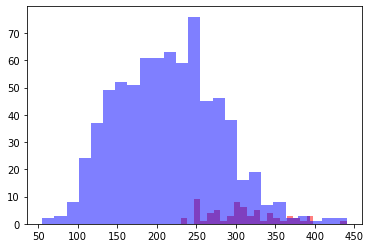

In [159]:
legendary = df[df['Legendary'] == True]['Sum']
ordinary = df[df['Legendary'] == False]['Sum']

stat, p = mannwhitneyu(legendary, ordinary)
print('Statistics=%.3f, p=%.3f' % (stat, p))

plt.hist(legendary, color='red', alpha=0.5, bins=25);
plt.hist(ordinary, color='blue', alpha=0.5, bins=25);

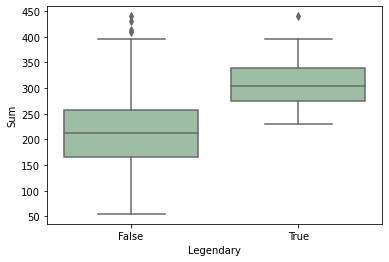

In [164]:
ax = sns.boxplot(x='Legendary', y='Sum', data=df, color='#99c2a2')
#ax = sns.swarmplot(x='Legendary', y='Sum', data=df, color='#7d0013')
plt.show()

### Сравним произведения показателей

Statistics=5741.500, p=0.000


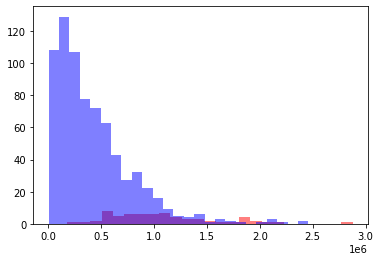

In [160]:
legendary = df[df['Legendary'] == True]['Prod']
ordinary = df[df['Legendary'] == False]['Prod']

stat, p = mannwhitneyu(legendary, ordinary)
print('Statistics=%.3f, p=%.3f' % (stat, p))

plt.hist(legendary, color='red', alpha=0.5, bins=25);
plt.hist(ordinary, color='blue', alpha=0.5, bins=25);

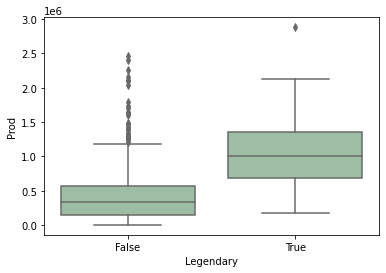

In [165]:
ax = sns.boxplot(x='Legendary', y='Prod', data=df, color='#99c2a2')
#ax = sns.swarmplot(x='Legendary', y='Sum', data=df, color='#7d0013')
plt.show()

Малое p-value говорит о различии выборок. Визуализации это подтверждают: мы видим существенные различия между показателями в пользу Legendary покемонов.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [119]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [174]:
rock = pokemon[pokemon['Class 1'] == 'Rock']['Defense']
ground = pokemon[pokemon['Class 1'] == 'Ground']['Defense']
steel = pokemon[pokemon['Class 1'] == 'Steel']['Defense']
ice = pokemon[pokemon['Class 1'] == 'Ice']['Defense']

F, p = f_oneway(rock, ground, steel, ice)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

10.576882027817977 3.0803014649204294e-06
Разное распределение (отклоняем H0)


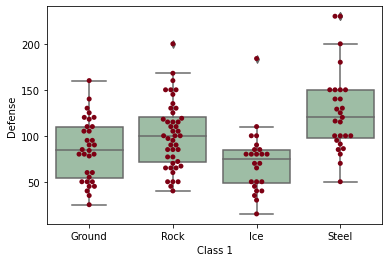

In [176]:
df = pokemon[pokemon['Class 1'].isin(best_defence_class)]

ax = sns.boxplot(x='Class 1', y='Defense', data=df, color='#99c2a2')
ax = sns.swarmplot(x="Class 1", y="Defense", data=df, color='#7d0013')
plt.show()

В этом случае, для сравнения нескольких выборок применим дисперсионный анализ. Результаты анализа и построенная визуализация говорят сами за себя: среди представленных наборов данных наблюдаются различия.